In [1]:
import math
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import joblib

person = pd.read_csv('../../data/star_schema/person.csv')
blood_info = pd.read_csv('../../data/star_schema/blood_info.csv')
medicine_info = pd.read_csv('../../data/star_schema/medicine_info.csv')
internal_health_info = pd.read_csv('../../data/star_schema/internal_health_info.csv')
eva =  pd.read_csv('../../data/star_schema/evaluation.csv')
time_info = pd.read_csv('../../data/star_schema/time_info.csv')


# Prepare Data

In [2]:
person = person.drop(range(216,240))
person

,SubjectID,Age,Gender,Height,Body weight,Smoking,Drinking,Measure Date Time,BMI,Body Age
0,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T15:46:25,24.0,72.0
1,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:23:39,24.5,72.0
2,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:35:21,24.5,71.0
3,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T23:18:12,24.5,72.0
4,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-22T07:41:49,24.2,72.0
...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-01T06:15:29,18.2,42.0
212,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-02T06:12:01,17.9,40.0
213,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-03T06:24:03,18.3,43.0
214,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-04T05:24:17,18.4,43.0


In [3]:
no_use_columns_blood_info = [' Irregular Pulse Flag', ' Pulse Rate Range Detection Flag']
blood_info = blood_info.drop(columns=no_use_columns_blood_info)
blood_info

,SubjectID,Measure Date Time,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Blood sugar
0,cefoxSR1601000701,2021-01-21T13:37:25,140,84,113,70,88.0
1,cefoxSR1601000701,2021-01-21T13:38:51,139,81,112,65,88.0
2,cefoxSR1601000701,2021-01-22T08:28:33,120,74,94,73,88.0
3,cefoxSR1601000701,2021-01-22T08:29:39,120,70,92,73,88.0
4,cefoxSR1601000701,2021-01-23T07:57:23,122,71,96,63,88.0
...,...,...,...,...,...,...,...
471,cefoxSR1707005601,2021-02-07T08:06:26,116,68,87,70,NaN
472,cefoxSR1707005601,2021-02-08T07:51:14,135,74,120,67,NaN
473,cefoxSR1707005601,2021-02-09T08:08:34,128,67,102,65,NaN
474,cefoxSR1707005601,2021-02-10T07:47:08,132,70,107,69,NaN


In [4]:
medicine_info = medicine_info.drop(range(15,39))
medicine_info

,SubjectID,Antihypertensive,Antidepressant,Osteoporosis drug,Antidiabetic drug,Other
0,cefoxSR1707005101,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract
1,cefoxSR1707003501,"Olmesartan, Nifedipine",NaN,NaN,NaN,"Donepezil, Famotidine, Lepamidine,Ttriazolam"
2,cefoxSR1601000701,NaN,NaN,NaN,NaN,"Crestor, Halcyon, Magnesium Oxide, Montelukast..."
3,cefoxSR1601005001,"Micardis, Calblock",NaN,NaN,NaN,Rivalo
4,cefoxSR1601005301,NaN,NaN,Eddy Roll Capsule、Alendronic acid,NaN,"Loxoprofen, Rebamipide, Bersolam, Sennoside, M..."
5,cefoxSR1601005701,NifedipineCR,NaN,NaN,NaN,"Bezafibrate, Etizolam, Antebate"
6,cefoxSR1707004301,Trichlormethiazide、Amlodipine,NaN,NaN,Gractive,"Zopiclone, Full Bath Titanium"
7,cefoxSR1707004501,Amlodipine,NaN,NaN,NaN,"Silodosin, Rosuvastatin, Magnesium oxide"
8,cefoxSR1707004401,NaN,NaN,NaN,NaN,NaN
9,cefoxSR1707004801,Valsartan、Nifedipine,NaN,NaN,NaN,NaN


In [5]:
internal_health_info = internal_health_info[['SubjectID',' Measure Date Time',' Body Fat Percentage', 'Total cholesterol']]
internal_health_info

,SubjectID,Measure Date Time,Body Fat Percentage,Total cholesterol
0,cefoxSR1601000701,2021-01-21T13:24:44,39.8,212.0
1,cefoxSR1601000701,2021-01-21T20:58:12,35.7,212.0
2,cefoxSR1601000701,2021-01-22T08:30:19,39.4,212.0
3,cefoxSR1601000701,2021-01-23T08:00:48,41.4,212.0
4,cefoxSR1601000701,2021-01-24T08:34:44,39.8,212.0
...,...,...,...,...
270,cefoxSR1707005601,2021-02-09T08:02:45,38.9,NaN
271,cefoxSR1707005601,2021-02-10T07:41:08,39.1,NaN
272,cefoxSR1707005601,2021-02-11T15:31:01,34.8,NaN
273,cefoxSR1707005601,2021-02-13T08:00:07,39.0,NaN


In [6]:
eva =eva[['SubjectID', 'Health status', 'Exercise function', 'Nutrition', 'Cognitive function', 'Exercise guidance', 'Nutrition guidance', 'Life guidance', 'High blood pressure']]
eva

,SubjectID,Health status,Exercise function,Nutrition,Cognitive function,Exercise guidance,Nutrition guidance,Life guidance,High blood pressure
0,cefoxSR1707004101,good,good,good,good,Aggressive exercise,Nothing,Guidance to enhance visuospatial cognitive fun...,Yes
1,cefoxSR1707003701,good,Observation required,Observation required,good,Mild exercise,Nutritional guidance for improving eating habits,Nothing,Nothing
2,cefoxSR1707005101,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
3,cefoxSR1707003501,Observation required,Observation required,good,Observation required,Mild exercise,Nothing,Guidance to increase physical activity,Yes
4,cefoxSR1601000701,good,good,Observation required,good,Aggressive exercise,Nutritional guidance for improving eating habits,Nothing,Nothing
5,cefoxSR1601005001,good,Observation required,good,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to increase physical activity,Yes
6,cefoxSR1601005301,Observation required,Observation required,good,good,Mild exercise,Nothing,Nothing,Nothing
7,cefoxSR1601005701,good,Observation required,good,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to increase physical activity,Yes
8,cefoxSR1707004301,good,good,good,good,Nothing,Nutritional guidance for improving eating habits,Nothing,Yes
9,cefoxSR1707004501,good,good,good,good,Nothing,Nothing,Nothing,Yes


In [7]:
time_info

,Measure Date Time,year,month,day,week,weekday,hour,minute,second
0,2021-01-21T13:37:25,2021.0,1.0,21.0,3.0,3.0,13.0,37.0,25.0
1,2021-01-21T13:38:51,2021.0,1.0,21.0,3.0,3.0,13.0,38.0,51.0
2,2021-01-22T08:28:33,2021.0,1.0,22.0,3.0,4.0,8.0,28.0,33.0
3,2021-01-22T08:29:39,2021.0,1.0,22.0,3.0,4.0,8.0,29.0,39.0
4,2021-01-23T07:57:23,2021.0,1.0,23.0,3.0,5.0,7.0,57.0,23.0
...,...,...,...,...,...,...,...,...,...
742,2021-02-13T09:22:09,2021.0,2.0,13.0,6.0,5.0,9.0,22.0,9.0
743,2021-02-13T09:22:25,2021.0,2.0,13.0,6.0,5.0,9.0,22.0,25.0
744,2021-02-13T19:34:40,2021.0,2.0,13.0,6.0,5.0,19.0,34.0,40.0
745,2021-02-14T18:47:40,2021.0,2.0,14.0,6.0,6.0,18.0,47.0,40.0


# Join tables

In [8]:
data_1 = pd.merge(person, time_info, on=' Measure Date Time', how='left')
data_1

,SubjectID,Age,Gender,Height,Body weight,Smoking,Drinking,Measure Date Time,BMI,Body Age,year,month,day,week,weekday,hour,minute,second
0,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T15:46:25,24.0,72.0,2021.0,1.0,21.0,3.0,3.0,15.0,46.0,25.0
1,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:23:39,24.5,72.0,2021.0,1.0,21.0,3.0,3.0,21.0,23.0,39.0
2,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:35:21,24.5,71.0,2021.0,1.0,21.0,3.0,3.0,21.0,35.0,21.0
3,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T23:18:12,24.5,72.0,2021.0,1.0,21.0,3.0,3.0,23.0,18.0,12.0
4,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-22T07:41:49,24.2,72.0,2021.0,1.0,22.0,3.0,4.0,7.0,41.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-01T06:15:29,18.2,42.0,2021.0,2.0,1.0,5.0,0.0,6.0,15.0,29.0
212,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-02T06:12:01,17.9,40.0,2021.0,2.0,2.0,5.0,1.0,6.0,12.0,1.0
213,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-03T06:24:03,18.3,43.0,2021.0,2.0,3.0,5.0,2.0,6.0,24.0,3.0
214,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-04T05:24:17,18.4,43.0,2021.0,2.0,4.0,5.0,3.0,5.0,24.0,17.0


In [9]:
data_2 = pd.merge(data_1, medicine_info, on= 'SubjectID', how='left')
data_2

,SubjectID,Age,Gender,Height,Body weight,Smoking,Drinking,Measure Date Time,BMI,Body Age,...,week,weekday,hour,minute,second,Antihypertensive,Antidepressant,Osteoporosis drug,Antidiabetic drug,Other
0,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T15:46:25,24.0,72.0,...,3.0,3.0,15.0,46.0,25.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract
1,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:23:39,24.5,72.0,...,3.0,3.0,21.0,23.0,39.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract
2,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:35:21,24.5,71.0,...,3.0,3.0,21.0,35.0,21.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract
3,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T23:18:12,24.5,72.0,...,3.0,3.0,23.0,18.0,12.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract
4,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-22T07:41:49,24.2,72.0,...,3.0,4.0,7.0,41.0,49.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-01T06:15:29,18.2,42.0,...,5.0,0.0,6.0,15.0,29.0,NaN,NaN,NaN,NaN,NaN
212,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-02T06:12:01,17.9,40.0,...,5.0,1.0,6.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN
213,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-03T06:24:03,18.3,43.0,...,5.0,2.0,6.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN
214,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-04T05:24:17,18.4,43.0,...,5.0,3.0,5.0,24.0,17.0,NaN,NaN,NaN,NaN,NaN


In [10]:
internal_health_info_time = pd.merge(internal_health_info, time_info, on=' Measure Date Time', how='left')[[
                          'SubjectID',' Body Fat Percentage', 'Total cholesterol','year', 'month', 'day', 'hour']]
internal_health_info_time = internal_health_info_time.drop_duplicates(['SubjectID', 'year', 'month', 'day', 'hour']).reset_index(drop=True)
internal_health_info_time

,SubjectID,Body Fat Percentage,Total cholesterol,year,month,day,hour
0,cefoxSR1601000701,39.8,212.0,2021.0,1.0,21.0,13.0
1,cefoxSR1601000701,35.7,212.0,2021.0,1.0,21.0,20.0
2,cefoxSR1601000701,39.4,212.0,2021.0,1.0,22.0,8.0
3,cefoxSR1601000701,41.4,212.0,2021.0,1.0,23.0,8.0
4,cefoxSR1601000701,39.8,212.0,2021.0,1.0,24.0,8.0
...,...,...,...,...,...,...,...
234,cefoxSR1707005601,38.9,NaN,2021.0,2.0,9.0,8.0
235,cefoxSR1707005601,39.1,NaN,2021.0,2.0,10.0,7.0
236,cefoxSR1707005601,34.8,NaN,2021.0,2.0,11.0,15.0
237,cefoxSR1707005601,39.0,NaN,2021.0,2.0,13.0,8.0


In [11]:
data_3 = pd.merge(data_2,internal_health_info_time, on=['SubjectID', 'year', 'month', 'day', 'hour'], how='left')
data_3

,SubjectID,Age,Gender,Height,Body weight,Smoking,Drinking,Measure Date Time,BMI,Body Age,...,hour,minute,second,Antihypertensive,Antidepressant,Osteoporosis drug,Antidiabetic drug,Other,Body Fat Percentage,Total cholesterol
0,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T15:46:25,24.0,72.0,...,15.0,46.0,25.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract,34.2,260.0
1,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:23:39,24.5,72.0,...,21.0,23.0,39.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract,31.0,260.0
2,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:35:21,24.5,71.0,...,21.0,35.0,21.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract,31.0,260.0
3,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T23:18:12,24.5,72.0,...,23.0,18.0,12.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract,31.4,260.0
4,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-22T07:41:49,24.2,72.0,...,7.0,41.0,49.0,Amlodipine,NaN,NaN,NaN,Tsumura Kakkonto extract,33.3,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-01T06:15:29,18.2,42.0,...,6.0,15.0,29.0,NaN,NaN,NaN,NaN,NaN,20.8,166.0
212,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-02T06:12:01,17.9,40.0,...,6.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,20.4,166.0
213,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-03T06:24:03,18.3,43.0,...,6.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN,20.1,166.0
214,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-04T05:24:17,18.4,43.0,...,5.0,24.0,17.0,NaN,NaN,NaN,NaN,NaN,21.5,166.0


In [12]:
blood_info_time = pd.merge(blood_info, time_info, on=' Measure Date Time', how='left')[[
                          'SubjectID',' Systolic Pressure', ' Diastolic Pressure',
                          ' Mean Arterial Pressure', ' Pulse Rate', 'Blood sugar',
                          'year', 'month', 'day', 'hour']]
blood_info_time = blood_info_time.drop_duplicates(['SubjectID', 'year', 'month', 'day', 'hour']).reset_index(drop=True)
blood_info_time

,SubjectID,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Blood sugar,year,month,day,hour
0,cefoxSR1601000701,140,84,113,70,88.0,2021.0,1.0,21.0,13.0
1,cefoxSR1601000701,120,74,94,73,88.0,2021.0,1.0,22.0,8.0
2,cefoxSR1601000701,122,71,96,63,88.0,2021.0,1.0,23.0,7.0
3,cefoxSR1601000701,128,80,104,70,88.0,2021.0,1.0,24.0,8.0
4,cefoxSR1601000701,120,71,96,76,88.0,2021.0,1.0,25.0,7.0
...,...,...,...,...,...,...,...,...,...,...
295,cefoxSR1707005601,116,68,87,70,NaN,2021.0,2.0,7.0,8.0
296,cefoxSR1707005601,135,74,120,67,NaN,2021.0,2.0,8.0,7.0
297,cefoxSR1707005601,128,67,102,65,NaN,2021.0,2.0,9.0,8.0
298,cefoxSR1707005601,132,70,107,69,NaN,2021.0,2.0,10.0,7.0


In [13]:
data_4 = pd.merge(data_3, blood_info_time, on=['SubjectID', 'year',	'month', 'day', 'hour'],  how='left')
data_4

,SubjectID,Age,Gender,Height,Body weight,Smoking,Drinking,Measure Date Time,BMI,Body Age,...,Osteoporosis drug,Antidiabetic drug,Other,Body Fat Percentage,Total cholesterol,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Blood sugar
0,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T15:46:25,24.0,72.0,...,NaN,NaN,Tsumura Kakkonto extract,34.2,260.0,92.0,68.0,82.0,75.0,NaN
1,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:23:39,24.5,72.0,...,NaN,NaN,Tsumura Kakkonto extract,31.0,260.0,140.0,80.0,111.0,69.0,NaN
2,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:35:21,24.5,71.0,...,NaN,NaN,Tsumura Kakkonto extract,31.0,260.0,140.0,80.0,111.0,69.0,NaN
3,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T23:18:12,24.5,72.0,...,NaN,NaN,Tsumura Kakkonto extract,31.4,260.0,NaN,NaN,NaN,NaN,NaN
4,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-22T07:41:49,24.2,72.0,...,NaN,NaN,Tsumura Kakkonto extract,33.3,260.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-01T06:15:29,18.2,42.0,...,NaN,NaN,NaN,20.8,166.0,165.0,73.0,134.0,53.0,91.0
212,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-02T06:12:01,17.9,40.0,...,NaN,NaN,NaN,20.4,166.0,134.0,82.0,104.0,52.0,91.0
213,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-03T06:24:03,18.3,43.0,...,NaN,NaN,NaN,20.1,166.0,155.0,83.0,121.0,48.0,91.0
214,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-04T05:24:17,18.4,43.0,...,NaN,NaN,NaN,21.5,166.0,138.0,80.0,127.0,60.0,91.0


In [14]:
data = pd.merge(data_4,eva, on = 'SubjectID', how='left')
data

,SubjectID,Age,Gender,Height,Body weight,Smoking,Drinking,Measure Date Time,BMI,Body Age,...,Pulse Rate,Blood sugar,Health status,Exercise function,Nutrition,Cognitive function,Exercise guidance,Nutrition guidance,Life guidance,High blood pressure
0,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T15:46:25,24.0,72.0,...,75.0,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
1,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:23:39,24.5,72.0,...,69.0,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
2,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:35:21,24.5,71.0,...,69.0,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
3,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T23:18:12,24.5,72.0,...,NaN,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
4,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-22T07:41:49,24.2,72.0,...,NaN,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-01T06:15:29,18.2,42.0,...,53.0,91.0,good,good,good,good,Nothing,Nothing,Nothing,Nothing
212,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-02T06:12:01,17.9,40.0,...,52.0,91.0,good,good,good,good,Nothing,Nothing,Nothing,Nothing
213,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-03T06:24:03,18.3,43.0,...,48.0,91.0,good,good,good,good,Nothing,Nothing,Nothing,Nothing
214,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-04T05:24:17,18.4,43.0,...,60.0,91.0,good,good,good,good,Nothing,Nothing,Nothing,Nothing


In [15]:
no_use_columns = ['year', 'month', 'day', 'week', 'weekday', 'hour', 'minute', 'second']
data = data.drop(columns=no_use_columns)
data

,SubjectID,Age,Gender,Height,Body weight,Smoking,Drinking,Measure Date Time,BMI,Body Age,...,Pulse Rate,Blood sugar,Health status,Exercise function,Nutrition,Cognitive function,Exercise guidance,Nutrition guidance,Life guidance,High blood pressure
0,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T15:46:25,24.0,72.0,...,75.0,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
1,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:23:39,24.5,72.0,...,69.0,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
2,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T21:35:21,24.5,71.0,...,69.0,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
3,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-21T23:18:12,24.5,72.0,...,NaN,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
4,cefoxSR1707005101,76.0,Female,154.0,56.5,no,no,2021-01-22T07:41:49,24.2,72.0,...,NaN,NaN,good,Observation required,Observation required,Observation required,Mild exercise,Nutritional guidance for improving eating habits,Guidance to enhance visuospatial cognitive fun...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-01T06:15:29,18.2,42.0,...,53.0,91.0,good,good,good,good,Nothing,Nothing,Nothing,Nothing
212,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-02T06:12:01,17.9,40.0,...,52.0,91.0,good,good,good,good,Nothing,Nothing,Nothing,Nothing
213,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-03T06:24:03,18.3,43.0,...,48.0,91.0,good,good,good,good,Nothing,Nothing,Nothing,Nothing
214,cefoxSR1707004601,71.0,Man,160.0,47.0,no,yes,2021-02-04T05:24:17,18.4,43.0,...,60.0,91.0,good,good,good,good,Nothing,Nothing,Nothing,Nothing


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SubjectID                216 non-null    object 
 1   Age                      216 non-null    float64
 2   Gender                   216 non-null    object 
 3   Height                   216 non-null    float64
 4   Body weight              216 non-null    float64
 5   Smoking                  216 non-null    object 
 6   Drinking                 216 non-null    object 
 7    Measure Date Time       212 non-null    object 
 8    BMI                     212 non-null    float64
 9    Body Age                212 non-null    float64
 10  Antihypertensive         139 non-null    object 
 11  Antidepressant           1 non-null      object 
 12  Osteoporosis drug        1 non-null      object 
 13  Antidiabetic drug        5 non-null      object 
 14  Other                    1

In [17]:
def cholesterol(x):
  if x == '\xad':
    return np.nan
  if not isinstance(x, float):
    return float(x.strip())
  return x
  
def checkNotNan(x):
  if isinstance(x, float):
    return not math.isnan(x)
  return True

In [18]:
data[' BMI'] = data[' BMI'].fillna(data.groupby('SubjectID')[' BMI'].transform('mean'))
data[' Body Age'] = data[' Body Age'].fillna(data.groupby('SubjectID')[' Body Age'].transform('mean'))
data['Antihypertensive'] = data['Antihypertensive'].fillna('None') 
data['Antidepressant'] = data['Antidepressant'].fillna('None') 
data['Osteoporosis drug'] = data['Osteoporosis drug'].fillna('None')   
data['Antidiabetic drug'] = data['Antidiabetic drug'].fillna('None')              
data['Other'] = data['Other'].fillna('None')   
data[' Body Fat Percentage'] = data[' Body Fat Percentage'].fillna(data.groupby('SubjectID')[' Body Fat Percentage'].transform('mean'))
data['Total cholesterol'] = data['Total cholesterol'].apply(cholesterol)             
data['Total cholesterol'] = data['Total cholesterol'].fillna(data['Total cholesterol'].mean()) 
data[' Systolic Pressure'] = data[' Systolic Pressure'].fillna(data.groupby('SubjectID')[' Systolic Pressure'].transform('mean'))
data[' Diastolic Pressure'] = data[' Diastolic Pressure'].fillna(data.groupby('SubjectID')[' Diastolic Pressure'].transform('mean'))
data[' Mean Arterial Pressure'] = data[' Mean Arterial Pressure'].fillna(data.groupby('SubjectID')[' Mean Arterial Pressure'].transform('mean'))
data[' Pulse Rate'] = data[' Pulse Rate'].fillna(data.groupby('SubjectID')[' Pulse Rate'].transform('mean'))
data['Blood sugar'] = data['Blood sugar'].fillna(data['Blood sugar'].mean()) 

In [19]:
data = data.dropna()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 215
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SubjectID                209 non-null    object 
 1   Age                      209 non-null    float64
 2   Gender                   209 non-null    object 
 3   Height                   209 non-null    float64
 4   Body weight              209 non-null    float64
 5   Smoking                  209 non-null    object 
 6   Drinking                 209 non-null    object 
 7    Measure Date Time       209 non-null    object 
 8    BMI                     209 non-null    float64
 9    Body Age                209 non-null    float64
 10  Antihypertensive         209 non-null    object 
 11  Antidepressant           209 non-null    object 
 12  Osteoporosis drug        209 non-null    object 
 13  Antidiabetic drug        209 non-null    object 
 14  Other                    2

# Dummies

In [21]:
data_dummied = pd.concat([data, pd.get_dummies(data['Gender'], prefix='Gender')], axis=1)
data_dummied = data_dummied.drop(['Gender'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Smoking'], prefix='Smoking')], axis=1)
data_dummied = data_dummied.drop(['Smoking'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Drinking'], prefix='Drinking')], axis=1)
data_dummied = data_dummied.drop(['Drinking'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Antihypertensive'], prefix='Antihypertensive')], axis=1)
data_dummied = data_dummied.drop(['Antihypertensive'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Antidepressant'], prefix='Antidepressant')], axis=1)
data_dummied = data_dummied.drop(['Antidepressant'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Osteoporosis drug'], prefix='Osteoporosis drug')], axis=1)
data_dummied = data_dummied.drop(['Osteoporosis drug'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Antidiabetic drug'], prefix='Antidiabetic drug')], axis=1)
data_dummied = data_dummied.drop(['Antidiabetic drug'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Other'], prefix='Other')], axis=1)
data_dummied = data_dummied.drop(['Other'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Health status'], prefix='Health status')], axis=1)
data_dummied = data_dummied.drop(['Health status'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Exercise function'], prefix='Exercise function')], axis=1)
data_dummied = data_dummied.drop(['Exercise function'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Nutrition'], prefix='Nutrition')], axis=1)
data_dummied = data_dummied.drop(['Nutrition'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['Cognitive function'], prefix='Cognitive function')], axis=1)
data_dummied = data_dummied.drop(['Cognitive function'], axis=1)
data_dummied = pd.concat([data_dummied, pd.get_dummies(data['High blood pressure'], prefix='High blood pressure')], axis=1)
data_dummied = data_dummied.drop(['High blood pressure'], axis=1)

In [22]:
col = data_dummied.pop(' Measure Date Time')
data_dummied.insert(1, ' Measure Date Time',col)
data_dummied

,SubjectID,Measure Date Time,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,...,Health status_Observation required,Health status_good,Exercise function_Observation required,Exercise function_good,Nutrition_Observation required,Nutrition_good,Cognitive function_Observation required,Cognitive function_good,High blood pressure_Nothing,High blood pressure_Yes
0,cefoxSR1707005101,2021-01-21T15:46:25,76.0,154.0,56.5,24.0,72.0,34.2,260.0,92.000000,...,0,1,1,0,1,0,1,0,0,1
1,cefoxSR1707005101,2021-01-21T21:23:39,76.0,154.0,56.5,24.5,72.0,31.0,260.0,140.000000,...,0,1,1,0,1,0,1,0,0,1
2,cefoxSR1707005101,2021-01-21T21:35:21,76.0,154.0,56.5,24.5,71.0,31.0,260.0,140.000000,...,0,1,1,0,1,0,1,0,0,1
3,cefoxSR1707005101,2021-01-21T23:18:12,76.0,154.0,56.5,24.5,72.0,31.4,260.0,124.000000,...,0,1,1,0,1,0,1,0,0,1
4,cefoxSR1707005101,2021-01-22T07:41:49,76.0,154.0,56.5,24.2,72.0,33.3,260.0,124.000000,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,2021-02-01T06:15:29,71.0,160.0,47.0,18.2,42.0,20.8,166.0,165.000000,...,0,1,0,1,0,1,0,1,1,0
212,cefoxSR1707004601,2021-02-02T06:12:01,71.0,160.0,47.0,17.9,40.0,20.4,166.0,134.000000,...,0,1,0,1,0,1,0,1,1,0
213,cefoxSR1707004601,2021-02-03T06:24:03,71.0,160.0,47.0,18.3,43.0,20.1,166.0,155.000000,...,0,1,0,1,0,1,0,1,1,0
214,cefoxSR1707004601,2021-02-04T05:24:17,71.0,160.0,47.0,18.4,43.0,21.5,166.0,138.000000,...,0,1,0,1,0,1,0,1,1,0


In [23]:
data_dummied2 = data_dummied.copy()
data_dummied2 = pd.concat([data_dummied2, pd.get_dummies(data['Exercise guidance']
                            , prefix='Exercise guidance')], axis=1)
data_dummied2 = data_dummied2.drop(['Exercise guidance'], axis=1)
data_dummied2 = pd.concat([data_dummied2, pd.get_dummies(data['Nutrition guidance']
                            , prefix='Nutrition guidance')], axis=1)
data_dummied2 = data_dummied2.drop(['Nutrition guidance'], axis=1)
data_dummied2 = pd.concat([data_dummied2, pd.get_dummies(data['Life guidance'], prefix='Life guidance')], axis=1)
data_dummied2 = data_dummied2.drop(['Life guidance'], axis=1)
data_dummied2

,SubjectID,Measure Date Time,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,...,High blood pressure_Nothing,High blood pressure_Yes,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing
0,cefoxSR1707005101,2021-01-21T15:46:25,76.0,154.0,56.5,24.0,72.0,34.2,260.0,92.000000,...,0,1,0,1,0,0,1,1,0,0
1,cefoxSR1707005101,2021-01-21T21:23:39,76.0,154.0,56.5,24.5,72.0,31.0,260.0,140.000000,...,0,1,0,1,0,0,1,1,0,0
2,cefoxSR1707005101,2021-01-21T21:35:21,76.0,154.0,56.5,24.5,71.0,31.0,260.0,140.000000,...,0,1,0,1,0,0,1,1,0,0
3,cefoxSR1707005101,2021-01-21T23:18:12,76.0,154.0,56.5,24.5,72.0,31.4,260.0,124.000000,...,0,1,0,1,0,0,1,1,0,0
4,cefoxSR1707005101,2021-01-22T07:41:49,76.0,154.0,56.5,24.2,72.0,33.3,260.0,124.000000,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,2021-02-01T06:15:29,71.0,160.0,47.0,18.2,42.0,20.8,166.0,165.000000,...,1,0,0,0,1,1,0,0,0,1
212,cefoxSR1707004601,2021-02-02T06:12:01,71.0,160.0,47.0,17.9,40.0,20.4,166.0,134.000000,...,1,0,0,0,1,1,0,0,0,1
213,cefoxSR1707004601,2021-02-03T06:24:03,71.0,160.0,47.0,18.3,43.0,20.1,166.0,155.000000,...,1,0,0,0,1,1,0,0,0,1
214,cefoxSR1707004601,2021-02-04T05:24:17,71.0,160.0,47.0,18.4,43.0,21.5,166.0,138.000000,...,1,0,0,0,1,1,0,0,0,1


In [24]:
all_col =['Smoking_yes']

In [25]:
data_dummied2 = data_dummied2.assign(**{col : 0 for col in np.setdiff1d(all_col,data_dummied2.columns.values)})
data_dummied2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 215
Data columns (total 54 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   SubjectID                                                            209 non-null    object 
 1    Measure Date Time                                                   209 non-null    object 
 2   Age                                                                  209 non-null    float64
 3   Height                                                               209 non-null    float64
 4   Body weight                                                          209 non-null    float64
 5    BMI                                                                 209 non-null    float64
 6    Body Age                                                            209 non-null    float64
 7    Body Fa

In [26]:
list(data_dummied2.columns)

['SubjectID',
 ' Measure Date Time',
 'Age',
 'Height',
 'Body weight',
 ' BMI',
 ' Body Age',
 ' Body Fat Percentage',
 'Total cholesterol',
 ' Systolic Pressure',
 ' Diastolic Pressure',
 ' Mean Arterial Pressure',
 ' Pulse Rate',
 'Blood sugar',
 'Gender_Female',
 'Gender_Man',
 'Smoking_no',
 'Drinking_no',
 'Drinking_yes',
 'Antihypertensive_Amlodipine',
 'Antihypertensive_Azilva、Amlodipine',
 'Antihypertensive_None',
 'Antihypertensive_Olmesartan, Nifedipine',
 'Antihypertensive_Trichlormethiazide、Amlodipine',
 'Antihypertensive_Valsartan、Nifedipine',
 'Antidepressant_None',
 'Osteoporosis drug_None',
 'Antidiabetic drug_Gractive',
 'Antidiabetic drug_None',
 'Other_Crestor, Halcyon, Magnesium Oxide, Montelukast, Loxoprofen',
 'Other_Donepezil, Famotidine, Lepamidine,Ttriazolam',
 'Other_None',
 'Other_Silodosin, Rosuvastatin, Magnesium oxide',
 'Other_Tsumura Kakkonto extract',
 'Other_Zopiclone, Full Bath Titanium',
 'Health status_Observation required',
 'Health status_good',


In [27]:
data_dummied2.describe()

,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,...,High blood pressure_Yes,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing,Smoking_yes
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.000000,209.000000,209.000000,209.00000,209.00000,209.000000,209.000000,209.000000,209.0
mean,73.516746,158.169856,57.648325,22.956938,61.215311,29.284689,232.203704,220.692897,162.766718,194.621380,...,0.636364,0.143541,0.492823,0.363636,0.45933,0.54067,0.291866,0.119617,0.588517,0.0
std,7.481449,5.411535,5.913398,3.604226,15.298836,7.419365,25.032241,371.809843,382.802592,376.787756,...,0.482201,0.351465,0.501149,0.482201,0.49954,0.49954,0.455713,0.325293,0.493284,0.0
min,51.000000,150.000000,45.000000,14.200000,22.000000,8.200000,166.000000,92.000000,59.000000,82.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
25%,71.000000,154.000000,56.500000,20.500000,51.000000,23.500000,232.203704,124.000000,76.000000,101.333333,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
50%,76.000000,156.000000,58.000000,23.900000,66.000000,29.600000,232.203704,135.090909,76.000000,109.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,1.000000,0.0
75%,77.000000,161.000000,60.000000,24.800000,73.000000,34.800000,260.000000,164.000000,86.000000,131.727273,...,1.000000,0.000000,1.000000,1.000000,1.00000,1.00000,1.000000,0.000000,1.000000,0.0
max,81.000000,169.500000,66.000000,36.200000,80.000000,41.400000,260.000000,2047.000000,2047.000000,2047.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,0.0


In [28]:
data_dummied2.columns[2:14]

Index(['Age', 'Height', 'Body weight', ' BMI', ' Body Age',
       ' Body Fat Percentage', 'Total cholesterol', ' Systolic Pressure',
       ' Diastolic Pressure', ' Mean Arterial Pressure', ' Pulse Rate',
       'Blood sugar'],
      dtype='object')

In [29]:
data_scaled = data_dummied2.copy()
scaler = StandardScaler()
scaler.fit(data_dummied2[data_scaled.columns[2:14]])
data_scaled[data_scaled.columns[2:14]] = scaler.transform(data_scaled[data_scaled.columns[2:14]])
data_scaled.describe()

,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,...,High blood pressure_Yes,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing,Smoking_yes
count,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,...,209.000000,209.000000,209.000000,209.000000,209.00000,209.00000,209.000000,209.000000,209.000000,209.0
mean,-3.399726e-17,1.733860e-15,4.929603e-16,1.291896e-15,6.799452e-17,-1.019918e-16,1.393888e-15,-3.399726e-17,-6.799452e-17,1.699863e-17,...,0.636364,0.143541,0.492823,0.363636,0.45933,0.54067,0.291866,0.119617,0.588517,0.0
std,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,...,0.482201,0.351465,0.501149,0.482201,0.49954,0.49954,0.455713,0.325293,0.493284,0.0
min,-3.016903e+00,-1.513336e+00,-2.144062e+00,-2.435464e+00,-2.569442e+00,-2.848669e+00,-2.651087e+00,-3.469566e-01,-2.717219e-01,-2.996164e-01,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
25%,-3.372060e-01,-7.723997e-01,-1.946567e-01,-6.833192e-01,-6.693214e-01,-7.815464e-01,1.138130e-15,-2.606845e-01,-2.272060e-01,-2.481822e-01,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
50%,3.327184e-01,-4.019315e-01,5.961361e-02,2.622828e-01,3.134995e-01,4.260042e-02,1.138130e-15,-2.307833e-01,-2.272060e-01,-2.277859e-01,...,1.000000,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,1.000000,0.0
75%,4.667033e-01,5.242392e-01,3.986407e-01,5.125892e-01,7.721492e-01,7.451518e-01,1.113086e+00,-1.528443e-01,-2.010201e-01,-1.673226e-01,...,1.000000,0.000000,1.000000,1.000000,1.00000,1.00000,1.000000,0.000000,1.000000,0.0
max,1.002643e+00,2.098729e+00,1.415722e+00,3.683137e+00,1.230799e+00,1.636852e+00,1.113086e+00,4.923732e+00,4.934024e+00,4.928043e+00,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,0.0


In [30]:
data_scaled_means = data_scaled.drop([' Measure Date Time'], axis = 1).groupby('SubjectID').mean()
data_scaled_means

,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,...,High blood pressure_Yes,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing,Smoking_yes
SubjectID,,,,,,,,,,,,,,,,,,,,,
cefoxSR1601000701,0.466703,-0.401931,0.398641,1.555533,1.230799,1.445625,-8.090451e-01,-0.249259,-0.229201,-0.246282,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707003501,1.002643,-0.031463,1.246208,-0.745618,-0.436065,-0.485934,1.138130e-15,1.627574,1.572445,1.612623,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
cefoxSR1707004201,-0.337206,1.820878,0.398641,-0.295163,-0.740540,-1.337243,1.138130e-15,-0.128090,-0.168883,-0.147733,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004301,0.600688,2.098729,1.415722,0.212222,0.247978,-0.135740,-8.891339e-01,-0.252596,-0.235716,-0.244413,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707004401,-3.016903,-1.513336,-2.144062,-1.151212,-1.721518,-0.523255,1.138130e-15,-0.165344,-0.169121,-0.167323,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004501,0.734673,1.265176,0.059614,-0.946604,-0.739211,-0.865312,1.138130e-15,-0.209640,-0.234538,-0.218741,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004601,-0.337206,0.339005,-1.805035,-1.295179,-1.254919,-1.170821,-2.651087e+00,-0.215032,-0.207305,-0.215016,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004801,-0.337206,-0.401931,0.059614,0.415248,-0.030488,0.015579,1.138130e-15,-0.194632,-0.232443,-0.206503,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707005101,0.332718,-0.772400,-0.194657,0.409549,0.701257,0.451019,1.113086e+00,-0.260684,-0.227206,-0.248182,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
data_scaled_means.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, cefoxSR1601000701 to cefoxSR1707005601
Data columns (total 52 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Age                                                                  10 non-null     float64
 1   Height                                                               10 non-null     float64
 2   Body weight                                                          10 non-null     float64
 3    BMI                                                                 10 non-null     float64
 4    Body Age                                                            10 non-null     float64
 5    Body Fat Percentage                                                 10 non-null     float64
 6   Total cholesterol                                                    10 non-null  

# Train/Test

In [32]:
y = data_scaled_means['High blood pressure_Yes']
x = data_scaled_means.drop(['High blood pressure_Yes','High blood pressure_Nothing'], axis=1)

In [33]:
y

SubjectID
cefoxSR1601000701    0.0
cefoxSR1707003501    1.0
cefoxSR1707004201    1.0
cefoxSR1707004301    1.0
cefoxSR1707004401    0.0
cefoxSR1707004501    1.0
cefoxSR1707004601    0.0
cefoxSR1707004801    1.0
cefoxSR1707005101    1.0
cefoxSR1707005601    0.0
Name: High blood pressure_Yes, dtype: float64

In [34]:
x

,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,...,Cognitive function_good,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing,Smoking_yes
SubjectID,,,,,,,,,,,,,,,,,,,,,
cefoxSR1601000701,0.466703,-0.401931,0.398641,1.555533,1.230799,1.445625,-8.090451e-01,-0.249259,-0.229201,-0.246282,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707003501,1.002643,-0.031463,1.246208,-0.745618,-0.436065,-0.485934,1.138130e-15,1.627574,1.572445,1.612623,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
cefoxSR1707004201,-0.337206,1.820878,0.398641,-0.295163,-0.740540,-1.337243,1.138130e-15,-0.128090,-0.168883,-0.147733,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004301,0.600688,2.098729,1.415722,0.212222,0.247978,-0.135740,-8.891339e-01,-0.252596,-0.235716,-0.244413,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707004401,-3.016903,-1.513336,-2.144062,-1.151212,-1.721518,-0.523255,1.138130e-15,-0.165344,-0.169121,-0.167323,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004501,0.734673,1.265176,0.059614,-0.946604,-0.739211,-0.865312,1.138130e-15,-0.209640,-0.234538,-0.218741,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004601,-0.337206,0.339005,-1.805035,-1.295179,-1.254919,-1.170821,-2.651087e+00,-0.215032,-0.207305,-0.215016,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004801,-0.337206,-0.401931,0.059614,0.415248,-0.030488,0.015579,1.138130e-15,-0.194632,-0.232443,-0.206503,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707005101,0.332718,-0.772400,-0.194657,0.409549,0.701257,0.451019,1.113086e+00,-0.260684,-0.227206,-0.248182,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


<AxesSubplot: xlabel='High blood pressure_Yes', ylabel='count'>

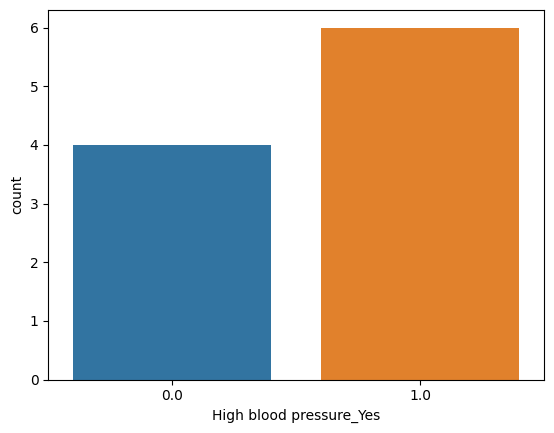

In [35]:
sn.countplot(x=data_scaled_means['High blood pressure_Yes'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=True, random_state=10)

In [37]:
X_train

,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,...,Cognitive function_good,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing,Smoking_yes
SubjectID,,,,,,,,,,,,,,,,,,,,,
cefoxSR1707004301,0.600688,2.098729,1.415722,0.212222,0.247978,-0.135740,-8.891339e-01,-0.252596,-0.235716,-0.244413,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707003501,1.002643,-0.031463,1.246208,-0.745618,-0.436065,-0.485934,1.138130e-15,1.627574,1.572445,1.612623,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
cefoxSR1601000701,0.466703,-0.401931,0.398641,1.555533,1.230799,1.445625,-8.090451e-01,-0.249259,-0.229201,-0.246282,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707004801,-0.337206,-0.401931,0.059614,0.415248,-0.030488,0.015579,1.138130e-15,-0.194632,-0.232443,-0.206503,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707004401,-3.016903,-1.513336,-2.144062,-1.151212,-1.721518,-0.523255,1.138130e-15,-0.165344,-0.169121,-0.167323,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707005601,-0.337206,0.524239,1.076695,0.692548,0.733607,1.119475,1.138130e-15,-0.230783,-0.222921,-0.221256,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [38]:
X_test

,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,...,Cognitive function_good,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing,Smoking_yes
SubjectID,,,,,,,,,,,,,,,,,,,,,
cefoxSR1707005101,0.332718,-0.772400,-0.194657,0.409549,0.701257,0.451019,1.113086e+00,-0.260684,-0.227206,-0.248182,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
cefoxSR1707004201,-0.337206,1.820878,0.398641,-0.295163,-0.740540,-1.337243,1.138130e-15,-0.128090,-0.168883,-0.147733,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004501,0.734673,1.265176,0.059614,-0.946604,-0.739211,-0.865312,1.138130e-15,-0.209640,-0.234538,-0.218741,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
cefoxSR1707004601,-0.337206,0.339005,-1.805035,-1.295179,-1.254919,-1.170821,-2.651087e+00,-0.215032,-0.207305,-0.215016,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
y_train

SubjectID
cefoxSR1707004301    1.0
cefoxSR1707003501    1.0
cefoxSR1601000701    0.0
cefoxSR1707004801    1.0
cefoxSR1707004401    0.0
cefoxSR1707005601    0.0
Name: High blood pressure_Yes, dtype: float64

In [40]:
y_test

SubjectID
cefoxSR1707005101    1.0
cefoxSR1707004201    1.0
cefoxSR1707004501    1.0
cefoxSR1707004601    0.0
Name: High blood pressure_Yes, dtype: float64

# Logistic Regression

In [41]:
logr = linear_model.LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=0)

In [42]:
y_pred = logr.predict(X_test)
y_pred

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


array([0., 1., 1., 0.])

In [43]:
cnf_matrix = confusion_matrix(y_test, y_pred) 
cnf_matrix 

array([[1, 0],
       [1, 2]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

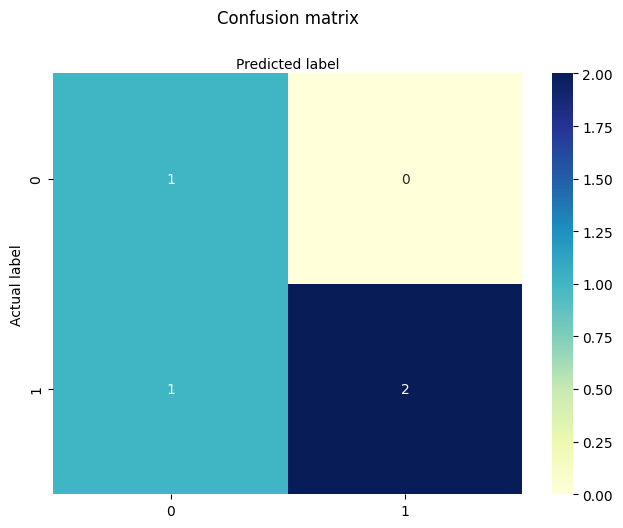

In [44]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         1.0       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



# RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=0)

In [47]:
rfc_pred = rfc.predict(X_test)
rfc_pred

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


array([0., 1., 1., 1.])

In [48]:
rfc_matrix = confusion_matrix(y_test, rfc_pred) 
rfc_matrix 

array([[0, 1],
       [1, 2]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

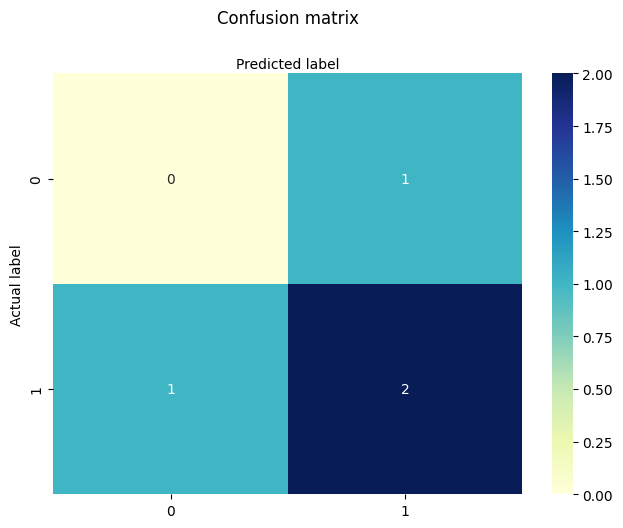

In [49]:
rfc_class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
rfc_tick_marks = np.arange(len(rfc_class_names)) 
plt.xticks(rfc_tick_marks, rfc_class_names) 
plt.yticks(rfc_tick_marks, rfc_class_names) 

# create heatmap 
sn.heatmap(pd.DataFrame(rfc_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [50]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



# Decision Tree

In [51]:
decisiontree = tree.DecisionTreeClassifier(random_state = 0)
decisiontree = decisiontree.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


In [52]:
y_pred_de = decisiontree.predict(X_test)
y_pred_de

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


array([0., 1., 1., 1.])

In [53]:
de_matrix = confusion_matrix(y_test, y_pred_de) 
de_matrix

array([[0, 1],
       [1, 2]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

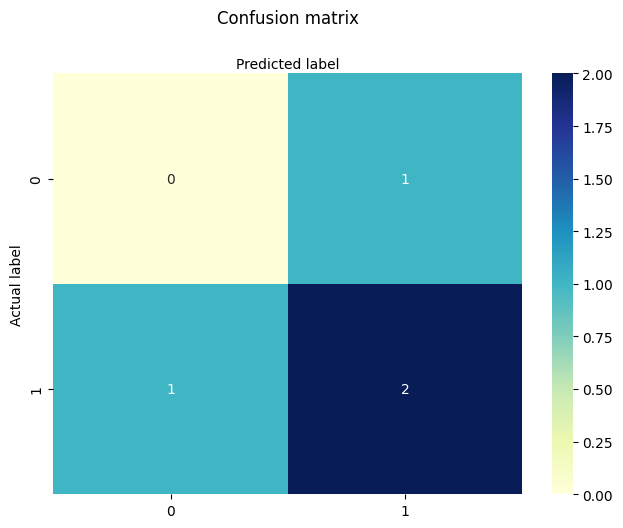

In [54]:
de_class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
de_tick_marks = np.arange(len(de_class_names)) 
plt.xticks(de_tick_marks, de_class_names) 
plt.yticks(de_tick_marks, de_class_names) 

# create heatmap 
sn.heatmap(pd.DataFrame(de_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [55]:
print(classification_report(y_test, y_pred_de))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



# Save Model

In [56]:
filename = 'model.sav'
joblib.dump(logr, filename)

['model.sav']

# Dashboard

In [57]:
dash = data_dummied2.copy()

In [58]:
dash[' Measure Date Time'] = pd.to_datetime(dash[' Measure Date Time'], format = "%Y-%m-%d %H:%M:%S")
dash

,SubjectID,Measure Date Time,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,...,High blood pressure_Yes,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing,Smoking_yes
0,cefoxSR1707005101,2021-01-21 15:46:25,76.0,154.0,56.5,24.0,72.0,34.2,260.0,92.000000,...,1,0,1,0,0,1,1,0,0,0
1,cefoxSR1707005101,2021-01-21 21:23:39,76.0,154.0,56.5,24.5,72.0,31.0,260.0,140.000000,...,1,0,1,0,0,1,1,0,0,0
2,cefoxSR1707005101,2021-01-21 21:35:21,76.0,154.0,56.5,24.5,71.0,31.0,260.0,140.000000,...,1,0,1,0,0,1,1,0,0,0
3,cefoxSR1707005101,2021-01-21 23:18:12,76.0,154.0,56.5,24.5,72.0,31.4,260.0,124.000000,...,1,0,1,0,0,1,1,0,0,0
4,cefoxSR1707005101,2021-01-22 07:41:49,76.0,154.0,56.5,24.2,72.0,33.3,260.0,124.000000,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,cefoxSR1707004601,2021-02-01 06:15:29,71.0,160.0,47.0,18.2,42.0,20.8,166.0,165.000000,...,0,0,0,1,1,0,0,0,1,0
212,cefoxSR1707004601,2021-02-02 06:12:01,71.0,160.0,47.0,17.9,40.0,20.4,166.0,134.000000,...,0,0,0,1,1,0,0,0,1,0
213,cefoxSR1707004601,2021-02-03 06:24:03,71.0,160.0,47.0,18.3,43.0,20.1,166.0,155.000000,...,0,0,0,1,1,0,0,0,1,0
214,cefoxSR1707004601,2021-02-04 05:24:17,71.0,160.0,47.0,18.4,43.0,21.5,166.0,138.000000,...,0,0,0,1,1,0,0,0,1,0


In [59]:
id_1 = dash[dash['SubjectID'] == 'cefoxSR1707005101']
id_1

,SubjectID,Measure Date Time,Age,Height,Body weight,BMI,Body Age,Body Fat Percentage,Total cholesterol,Systolic Pressure,...,High blood pressure_Yes,Exercise guidance_Aggressive exercise,Exercise guidance_Mild exercise,Exercise guidance_Nothing,Nutrition guidance_Nothing,Nutrition guidance_Nutritional guidance for improving eating habits,Life guidance_Guidance to enhance visuospatial cognitive function,Life guidance_Guidance to increase physical activity,Life guidance_Nothing,Smoking_yes
0,cefoxSR1707005101,2021-01-21 15:46:25,76.0,154.0,56.5,24.0,72.0,34.2,260.0,92.0,...,1,0,1,0,0,1,1,0,0,0
1,cefoxSR1707005101,2021-01-21 21:23:39,76.0,154.0,56.5,24.5,72.0,31.0,260.0,140.0,...,1,0,1,0,0,1,1,0,0,0
2,cefoxSR1707005101,2021-01-21 21:35:21,76.0,154.0,56.5,24.5,71.0,31.0,260.0,140.0,...,1,0,1,0,0,1,1,0,0,0
3,cefoxSR1707005101,2021-01-21 23:18:12,76.0,154.0,56.5,24.5,72.0,31.4,260.0,124.0,...,1,0,1,0,0,1,1,0,0,0
4,cefoxSR1707005101,2021-01-22 07:41:49,76.0,154.0,56.5,24.2,72.0,33.3,260.0,124.0,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,cefoxSR1707005101,2021-01-26 14:40:00,76.0,154.0,56.5,24.1,72.0,35.2,260.0,124.0,...,1,0,1,0,0,1,1,0,0,0
57,cefoxSR1707005101,2021-01-26 14:55:39,76.0,154.0,56.5,24.2,73.0,35.2,260.0,124.0,...,1,0,1,0,0,1,1,0,0,0
58,cefoxSR1707005101,2021-01-26 15:49:30,76.0,154.0,56.5,24.3,72.0,34.3,260.0,124.0,...,1,0,1,0,0,1,1,0,0,0
59,cefoxSR1707005101,2021-01-26 19:07:21,76.0,154.0,56.5,23.9,70.0,29.7,260.0,124.0,...,1,0,1,0,0,1,1,0,0,0


In [60]:
date = id_1[' Measure Date Time']
date

0    2021-01-21 15:46:25
1    2021-01-21 21:23:39
2    2021-01-21 21:35:21
3    2021-01-21 23:18:12
4    2021-01-22 07:41:49
             ...        
56   2021-01-26 14:40:00
57   2021-01-26 14:55:39
58   2021-01-26 15:49:30
59   2021-01-26 19:07:21
60   2021-01-26 20:47:48
Name:  Measure Date Time, Length: 61, dtype: datetime64[ns]

In [61]:
systolic = id_1[' Systolic Pressure']
systolic

0      92.0
1     140.0
2     140.0
3     124.0
4     124.0
      ...  
56    124.0
57    124.0
58    124.0
59    124.0
60    124.0
Name:  Systolic Pressure, Length: 61, dtype: float64

In [62]:
diastolic = id_1[' Diastolic Pressure']
diastolic

0     68.0
1     80.0
2     80.0
3     76.0
4     76.0
      ... 
56    76.0
57    76.0
58    76.0
59    76.0
60    76.0
Name:  Diastolic Pressure, Length: 61, dtype: float64

In [63]:
map = id_1[' Mean Arterial Pressure']
map

0      82.000000
1     111.000000
2     111.000000
3     101.333333
4     101.333333
         ...    
56    101.333333
57    101.333333
58    101.333333
59    101.333333
60    101.333333
Name:  Mean Arterial Pressure, Length: 61, dtype: float64

Text(0, 0.5, 'Pressure')

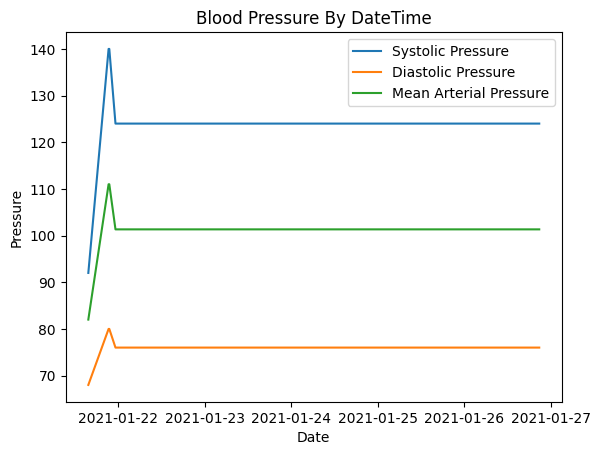

In [64]:
plt.plot(date, systolic)
plt.plot(date, diastolic)
plt.plot(date, map)
plt.legend(['Systolic Pressure', 'Diastolic Pressure', 'Mean Arterial Pressure'])
plt.title('Blood Pressure By DateTime')
plt.xlabel('Date')
plt.ylabel('Pressure')

In [65]:
pulse = id_1[' Pulse Rate']
pulse

0     75.0
1     69.0
2     69.0
3     71.0
4     71.0
      ... 
56    71.0
57    71.0
58    71.0
59    71.0
60    71.0
Name:  Pulse Rate, Length: 61, dtype: float64

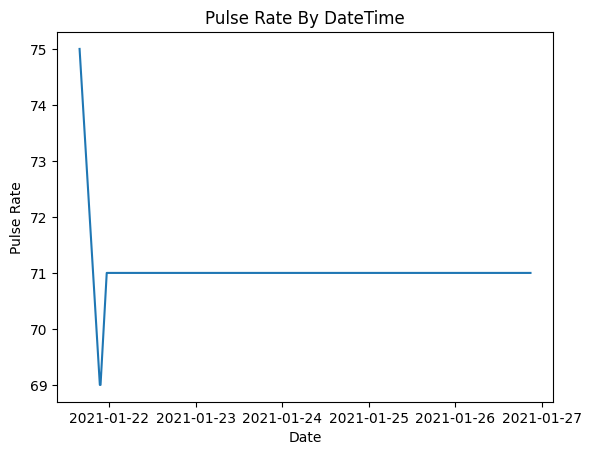

In [66]:
plt.plot(date, pulse)
plt.title('Pulse Rate By DateTime')
plt.xlabel('Date')
plt.ylabel('Pulse Rate')
plt.show()